# **DATA SCIENCE: ANÁLISE EM BASE DE DADOS DE CASOS DE DENGUE (SINAN)**

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/Shared drives/TCC - Mineração de Dados/DBF DENGUE Final/Dengue(Primeira Filtragem).csv', sep=";")


In [0]:
uri = 'https://media.githubusercontent.com/media/migueelcruz/DataScience_Dengue/master/Dengue(Primeira%20Filtragem).csv'
df = pd.read_csv(uri, sep=";")

In [0]:
df.drop(['Unnamed: 33'], axis= 1 ,inplace=True)

obitos_2018 = df.query("dt_obito < '2019-01-01'").index
df.drop(obitos_2018, inplace=True)

In [0]:
notific_2018 = df.query("dt_notific < '2019-01-01'").index
df.drop(notific_2018, inplace=True)

In [7]:
df

,nu_notific,dt_notific,sg_uf_not,id_municip,dt_sin_pri,dt_nasc,cs_sexo,cs_raca,cs_escol_n,id_mn_resi,febre,mialgia,cefaleia,exantema,vomito,nausea,dor_costas,conjuntvit,artrite,artralgia,petequia_n,leucopenia,laco,dor_retro,diabetes,hematolog,hepatopat,renal,hipertensa,acido_pept,auto_imune,evolucao,dt_obito
0,48694,2019-01-04,12,120020,2019-01-01,1977-03-02,F,4.0,1.0,120020.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,None
1,46973,2019-04-10,12,120020,2019-04-01,1981-06-23,F,4.0,NaN,120020.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,None
2,50975,2019-09-23,12,120020,2019-09-21,1967-02-11,F,4.0,5.0,120020.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,None
3,30658,2019-01-05,12,120033,2019-01-02,1986-07-30,F,4.0,9.0,120033.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,None
4,30698,2019-01-15,12,120033,2019-01-10,1987-01-29,F,4.0,4.0,120033.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069119,2671516,2019-09-18,17,171610,2019-09-13,1977-07-24,M,4.0,6.0,171845.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2069120,2255009,2019-08-29,17,170950,2019-08-26,1982-01-19,F,4.0,6.0,170950.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,None
2069121,2342012,2019-09-27,17,170210,2019-09-15,1997-08-16,F,4.0,6.0,170210.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,None
2069122,2671512,2019-09-17,17,171610,2019-09-09,1973-04-11,F,4.0,6.0,171610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


# Gráfico de Quantidade de Casos por Gênero

Text(0, 0.5, 'Quantidade')

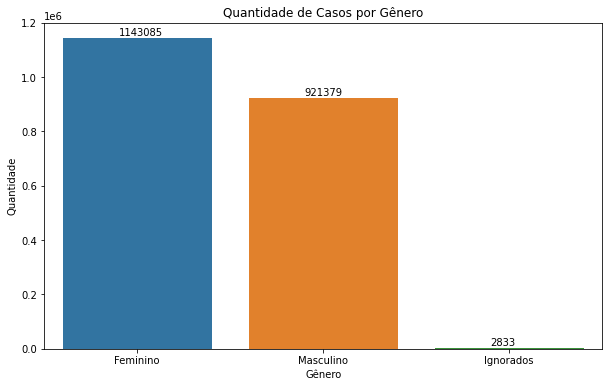

In [8]:
contagem_sexo = df["cs_sexo"].value_counts().to_frame().reset_index()
contagem_sexo.columns = ["Sexo", "Total"]

plt.figure(figsize=(10,6))
g = sns.barplot(x='Sexo', y='Total', data=contagem_sexo)

for p in g.patches:
  b=p.get_bbox()
  g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 0.3, p.get_height()+10000))

g.set_title('Quantidade de Casos por Gênero')
g.set_xlabel('Gênero')
g.set_xticklabels(['Feminino', 'Masculino', 'Ignorados'])
g.set_ylabel('Quantidade')




# Qual período do ano teve mais casos mortais de dengue:

Text(0.5, 0, 'Mês do Óbito')

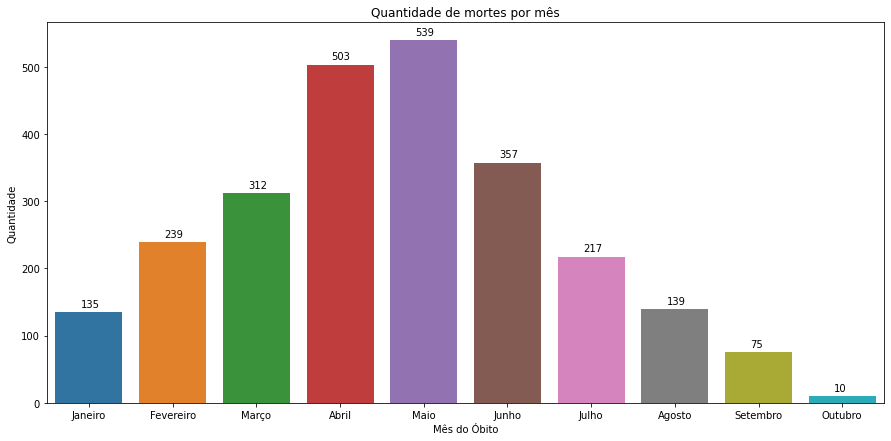

In [9]:
#Tratamento de Dados

obitos = pd.DataFrame(df, columns= ['cs_sexo', 'dt_obito'])
quantidade_obitos_correto = obitos.apply(lambda x: x.replace('None', np.nan))
quantidade_obitos_correto.dropna(inplace=True)
quantidade_obitos_correto.reset_index()
quantidade_obitos_correto['dt_obito'] = pd.to_datetime(quantidade_obitos_correto['dt_obito'], format='%Y-%m-%d')
quantidade_obitos_correto['mes_obito'] = quantidade_obitos_correto['dt_obito'].dt.strftime('%B')

#Final do Tratamento

#Inicio Plot

ordem = ["January", "February","March","April","May","June","July", "August", "September", "October"]

plt.figure(figsize=(15,7))
g = sns.countplot(x="mes_obito", order=ordem ,data=quantidade_obitos_correto)

for p in g.patches:
  b=p.get_bbox()
  g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 0.3, p.get_height()+8))

g.set_xticklabels(["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"])
g.set_title('Quantidade de mortes por mês')
g.set_ylabel("Quantidade")
g.set_xlabel("Mês do Óbito")

#Final plot




In [10]:
obitos = pd.DataFrame(df, columns= ['cs_sexo', 'dt_obito'])
quantidade_obitos_correto = obitos.apply(lambda x: x.replace('None', np.nan))
quantidade_obitos_correto.dropna(inplace=True)
quantidade_obitos_correto.columns = ['Sexo', 'Data_Obito']
quantidade_obitos_correto.reset_index()

,index,Sexo,Data_Obito
0,2696,M,2019-08-05
1,3473,M,2019-04-28
2,5397,M,2019-02-26
3,5596,M,2019-04-20
4,9255,M,2019-08-01
...,...,...,...
2521,2067074,F,2019-05-16
2522,2067107,F,2019-05-21
2523,2067978,F,2019-06-22
2524,2068122,M,2019-06-13


# Qual período do ano teve mais casos de dengue:

Text(0.5, 0, 'Mês do Caso')

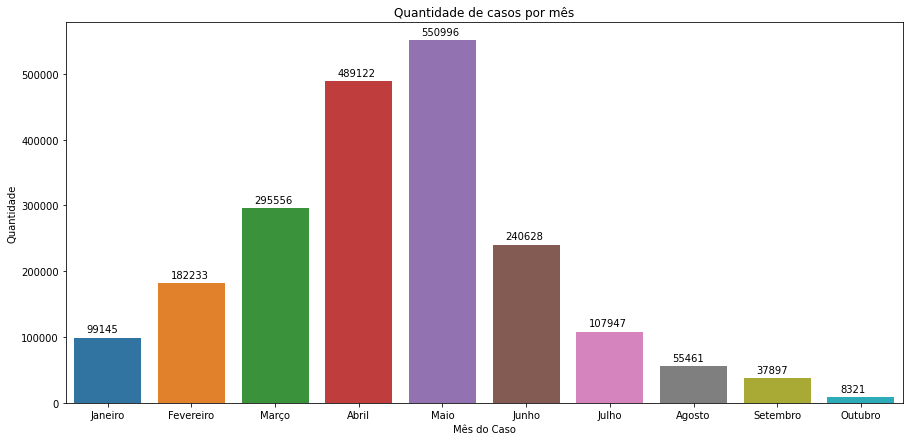

In [11]:
#Tratamento de Dados
notificacoes = pd.DataFrame(df, columns=['dt_notific','nu_notific'])
notificacoes.reset_index()
notificacoes['dt_notific'] = pd.to_datetime(notificacoes['dt_notific'], format='%Y-%m-%d')
notificacoes['mes_notific'] = notificacoes['dt_notific'].dt.strftime('%B')

#Fianl Tratamento de dados

#Inicio Plot
ordem = ["January", "February","March","April","May","June","July", "August", "September", "October"]

plt.figure(figsize=(15,7))
g = sns.countplot(x="mes_notific", order=ordem ,data=notificacoes)

for p in g.patches:
  b=p.get_bbox()
  g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 0.15, p.get_height()+8000))

g.set_xticklabels(["Janeiro","Fevereiro","Março","Abril","Maio","Junho","Julho","Agosto","Setembro","Outubro"])
g.set_title('Quantidade de casos por mês')
g.set_ylabel("Quantidade")
g.set_xlabel("Mês do Caso")

#Final Plot


# Período do ano onde houve mais casos de dengue com caso de morte

In [12]:
#0 -> Não
#1 -> Sim

casos_e_mortes = pd.DataFrame(df, columns=['dt_notific', 'dt_obito'])

casos_e_mortes = casos_e_mortes.apply(lambda x: x.replace('None', np.nan))

casos_e_mortes['dt_notific'] = pd.to_datetime(casos_e_mortes['dt_notific'], format='%Y-%m-%d')
casos_e_mortes['dt_obito'] = pd.to_datetime(casos_e_mortes['dt_obito'], format='%Y-%m-%d')
  
casos_e_mortes['mes_notific'] = casos_e_mortes['dt_notific'].dt.strftime('%m')
casos_e_mortes['mes_obito'] = casos_e_mortes['dt_obito'].dt.strftime('%m')

casos_e_mortes


,dt_notific,dt_obito,mes_notific,mes_obito
0,2019-01-04,NaT,01,NaN
1,2019-04-10,NaT,04,NaN
2,2019-09-23,NaT,09,NaN
3,2019-01-05,NaT,01,NaN
4,2019-01-15,NaT,01,NaN
...,...,...,...,...
2069119,2019-09-18,NaT,09,NaN
2069120,2019-08-29,NaT,08,NaN
2069121,2019-09-27,NaT,09,NaN
2069122,2019-09-17,NaT,09,NaN


In [13]:
casos_e_mortes['morreu'] = 0

casos_e_mortes.loc[[2696, 3473, 5397, 5596, 9255, 9331, 9425, 12083, 12290, 
14594, 14616, 15274, 15790, 16024, 16230, 16629, 16820, 
16867, 16922, 17667, 17730, 22027, 22093, 22477, 23039, 
23165, 23284, 23907, 24400, 26725, 26816, 27941, 29361, 
30414, 31241, 31245, 31250, 32258, 33355, 34233, 34346, 
36001, 36072, 36924, 36961, 37055, 37247, 37914, 39884, 
40221, 41494, 41578, 41593, 41652, 42939, 45161, 45204, 
45296, 46412, 47813, 49321, 50590, 50688, 51129, 51452, 
51891, 52112, 53933, 56369, 57333, 59479, 62898, 63576, 
63718, 64363, 64557, 64697, 68165, 68431, 69002, 69271, 
70666, 73750, 74344, 75598, 75744, 75977, 76292, 76293, 
76404, 76425, 76688, 76859, 77924, 78693, 79388, 79473, 
79570, 80058, 80314, 80823, 80865, 82002, 82028, 82681, 
82914, 83750, 84128, 85491, 86179, 86702, 87461, 87825, 
88021, 88682, 89847, 90265, 91268, 91642, 92395, 93582, 
93816, 93997, 94326, 94832, 95674, 96674, 97674, 98144, 
98911, 101142, 101249, 103631, 104278, 104913, 105291, 
106484, 107421, 107612, 109926, 110102, 110483, 110680, 
112689, 113036, 113089, 113175, 113353, 113573, 114383, 
114384, 114937, 115208, 115307, 116941, 117220, 117720, 
117764, 118561, 118569, 118672, 118912, 119305, 119457, 
119525, 119773, 120157, 120337, 121766, 121783, 122380, 
122517, 122538, 122689, 122705, 122954, 123332, 123365, 
124017, 124295, 124553, 124642, 126470, 126537, 126542, 
126812, 126920, 127849, 128455, 129382, 129569, 130119, 
131090, 131132, 131356, 131371, 131793, 131796, 131802, 
131803, 132119, 132158, 133180, 133290, 133405, 133946, 
134845, 134857, 135101, 135949, 135977, 136268, 136966, 
137397, 137453, 137664, 138254, 138832, 139194, 139524, 
139830, 140444, 140592, 140862, 141037, 141287, 141430, 
143934, 143959, 145060, 145687, 146282, 146403, 146654, 
146886, 146951, 147098, 147616, 147788, 147830, 147977, 
147984, 148091, 148272, 148364, 148681, 148706, 148796, 
149563, 150051, 150335, 150523, 151464, 151694, 151905, 
152009, 152351, 152583, 152687, 152716, 153752, 154978, 
155181, 155302, 155839, 155859, 156482, 156995, 157192, 
157613, 158795, 160449, 160661, 160781, 160805, 161226, 
161241, 161275, 161624, 161680, 162233, 162439, 162471, 
162560, 162634, 162867, 163327, 165696, 165856, 166174, 
166317, 167781, 168016, 168194, 168479, 168505, 168603, 
168973, 169097, 170404, 171925, 172093, 172139, 172306, 
172309, 172341, 172801, 172825, 173532, 174224, 174386, 
174444, 174518, 174681, 176593, 176624, 176648, 177949, 
178624, 178711, 180432, 180996, 181828, 181908, 182032, 
182081, 182752, 182769, 182985, 183020, 183045, 183070, 
183304, 183510, 183755, 183772, 183825, 184116, 184331, 
184417, 184536, 184582, 184647, 184669, 184687, 184739, 
184760, 184783, 184810, 184882, 185975, 186169, 186261, 
186333, 186901, 188282, 188497, 189021, 190364, 190610, 
192561, 192660, 192890, 194111, 194503, 194697, 194898, 
195022, 195044, 195741, 195914, 196035, 196720, 197291, 
197435, 198505, 198707, 199517, 200214, 201164, 202811, 
204711, 205103, 205595, 206274, 206605, 208838, 209477, 
211061, 211602, 212273, 213361, 214394, 214536, 215691, 
216902, 218460, 222463, 222957, 224793, 225285, 225838, 
226858, 227179, 227203, 227267, 230487, 230761, 231894, 
234400, 236714, 237103, 237956, 237980, 239029, 239299, 
242404, 242833, 243014, 245033, 245080, 246333, 250575, 
251246, 252222, 252446, 254529, 254706, 257117, 257452, 
260474, 260488, 260589, 260592, 260874, 261197, 261698, 
262010, 262744, 264300, 264609, 266305, 266500, 267821, 
268048, 268708, 269553, 270384, 271184, 272778, 274136, 
274542, 274543, 275050, 275095, 277176, 277358, 277434, 
278091, 278360, 278583, 279448, 279680, 280896, 281451, 
281645, 282617, 282647, 282802, 282951, 284952, 285485, 
286369, 286382, 286702, 286830, 288553, 288605, 288723, 
290268, 290540, 290938, 291001, 291668, 292764, 292861, 
293969, 294626, 295309, 296006, 296132, 296581, 299302, 
299428, 300485, 300504, 301557, 301831, 302512, 302953, 
303167, 303845, 304205, 304785, 304870, 305427, 305685, 
306403, 307307, 307597, 308300, 308619, 308642, 309819, 
311190, 312171, 313552, 314168, 314606, 314930, 316724, 
317263, 317651, 317818, 319158, 319162, 319578, 319835, 
319934, 321378, 321811, 322230, 322546, 322687, 322890, 
324905, 325008, 325247, 326526, 326896, 328091, 328609, 
328742, 328822, 331109, 331190, 331353, 332010, 332441, 
332671, 333456, 333644, 334058, 334114, 335173, 335243, 
335394, 335627, 335854, 337726, 337894, 338448, 339918, 
341920, 342077, 342782, 342793, 344574, 345097, 345292, 
345996, 346397, 346982, 348770, 348854, 350347, 351748, 
352354, 353855, 354063, 354279, 354324, 357072, 358110, 
358525, 359004, 359025, 360931, 361319, 361709, 362926, 
363178, 363511, 363977, 365290, 365845, 366892, 366994, 
367642, 367751, 368005, 368173, 368413, 368522, 368736, 
370282, 370599, 370929, 371795, 373181, 373270, 373865, 
374731, 375282, 377179, 377194, 377232, 378334, 378938, 
379372, 379695, 380579, 380874, 382510, 383563, 383616, 
383992, 385556, 386940, 387038, 388593, 389430, 389564, 
390427, 390689, 390694, 391712, 392864, 393187, 393891, 
394533, 395289, 395378, 395752, 397242, 398165, 399093, 
400072, 400088, 400418, 400688, 400932, 400983, 401397, 
401619, 402257, 402365, 402469, 404033, 404127, 404128, 
404849, 405241, 405260, 405963, 406352, 406447, 406513, 
406840, 407036, 407539, 407541, 408784, 410513, 411315, 
411962, 413127, 414947, 417629, 418380, 420206, 420893, 
424781, 425348, 427675, 429738, 430748, 432866, 432920, 
433529, 434173, 434244, 435389, 437676, 438920, 438988, 
445403, 446391, 447775, 447948, 448071, 449836, 451774, 
454846, 455357, 455413, 455721, 455799, 460208, 460929, 
462119, 462250, 463166, 463391, 465666, 466376, 466730, 
468581, 469501, 470298, 471253, 471602, 477774, 478822, 
479002, 479049, 481585, 481807, 481870, 483816, 485324, 
487134, 487333, 487876, 490550, 491576, 492535, 494040, 
495177, 496239, 496270, 496891, 497728, 498932, 499693, 
500074, 500810, 503274, 505165, 507687, 509543, 511897, 
512200, 515370, 515662, 516259, 516658, 518617, 526744, 
526832, 527270, 530770, 531014, 534736, 535150, 538973, 
540326, 540915, 541479, 545498, 548431, 548785, 548871, 
549347, 551594, 555022, 555726, 555942, 556119, 556231, 
559566, 561057, 562822, 565881, 565910, 567361, 567481, 
568678, 571898, 573106, 573560, 573613, 575734, 575990, 
576244, 577615, 580618, 581877, 583361, 584641, 586516, 
587056, 590361, 590791, 591818, 591915, 592106, 602177, 
603056, 603153, 603613, 605932, 606757, 607317, 608574, 
613523, 618413, 618449, 618968, 621041, 621189, 623087, 
623389, 626091, 626959, 629138, 630739, 636242, 636406, 
636810, 638786, 638800, 639787, 640378, 640625, 640839, 
640884, 641347, 642313, 643236, 645111, 653494, 655715, 
656172, 656361, 656644, 660799, 661248, 663449, 665124, 
665926, 666051, 667297, 669526, 672363, 674649, 675869, 
676319, 676715, 677804, 678996, 680636, 681174, 681469, 
682055, 684283, 684739, 686140, 686223, 686408, 687320, 
689596, 691956, 693305, 695088, 695599, 696004, 696984, 
698537, 698795, 699328, 699872, 700199, 702298, 704163, 
705054, 708131, 709107, 709693, 710782, 710858, 712017, 
712638, 713445, 714137, 716444, 720060, 722294, 722477, 
724606, 726964, 728210, 728570, 729500, 733126, 734625, 
736711, 738062, 741523, 741927, 742033, 742374, 742440, 
742753, 744335, 744995, 747433, 750653, 751635, 753841, 
755429, 756568, 757078, 757862, 758356, 759092, 760707, 
762824, 773251, 775511, 776509, 780628, 781246, 782220, 
785837, 786830, 787344, 787490, 788132, 788830, 789184, 
789380, 790341, 794017, 794592, 798992, 799325, 805666, 
807911, 809832, 810017, 816621, 818013, 818289, 819730, 
821800, 823718, 825013, 825157, 827401, 828651, 829854, 
830137, 830733, 832571, 834039, 836038, 837244, 837307, 
838695, 841103, 841618, 841852, 843205, 844129, 845385, 
845743, 845836, 847078, 850199, 852583, 853452, 854940, 
855115, 858039, 859682, 859734, 859788, 860331, 862134, 
862402, 863397, 865174, 866294, 867480, 868921, 871504, 
873738, 873802, 873851, 874532, 874910, 875489, 876076, 
876104, 879509, 879953, 880149, 880942, 881982, 883336, 
887189, 888444, 889058, 889253, 889994, 890039, 890111, 
892713, 892844, 892913, 894950, 895475, 897772, 899224, 
900292, 901921, 903713, 903778, 903824, 904256, 905501, 
907748, 909234, 909577, 912467, 912913, 913689, 916319, 
916349, 916684, 921978, 922445, 927511, 928451, 928692, 
930247, 931478, 932024, 933995, 934885, 935856, 938990, 
941904, 945660, 946544, 948811, 949430, 950521, 950766, 
954642, 956726, 957393, 959427, 961446, 961531, 962261, 
963807, 966538, 969549, 970176, 971735, 971774, 972735, 
973214, 973421, 973740, 975359, 976499, 977525, 978869, 980793, 981515, 982149, 982976, 983482, 986437, 987160, 987232, 987899, 988478, 991949, 994534, 995147, 995868, 995956, 996620, 998356, 999319, 999708, 1001201, 1002761, 1004402, 1004414, 1004643, 1005287, 1007129, 1007321, 1007943, 1008246, 1008460, 1008651, 1008729, 1009375, 1010604, 1012396, 1013295, 1014987, 1018134, 1018840, 1019540, 1020042, 1020181, 1022371, 1026837, 1027094, 1027343, 1027753, 1028355, 1028361, 1028808, 1029675, 1032277, 1032769, 1033558, 1036956, 1038044, 1038188, 1040187, 1042527, 1043432, 1043912, 1045706, 1046394, 1046674, 1047485, 1049241, 1050274, 1050421, 1051943, 1052070, 1052916, 1053914, 1053946, 1054948, 1054955, 1060843, 1063388, 1064280, 1064385, 1065514, 1067407, 1069379, 1069525, 1069653, 1069736, 1070145, 1071305, 1071941, 1072382, 1073372, 1075980, 1076153, 1076494, 1076586, 1077437, 1078191, 1078574, 1078577, 1078642, 1078904, 1078982, 1079188, 1079223, 1079595, 1080351, 1080975, 1081322, 1082255, 1082774, 1082776, 1082791, 1082993, 1083050, 1083310, 1083418, 1083484, 1083774, 1084027, 1084135, 1085275, 1086015, 1087083, 1087112, 1087143, 1087917, 1088354, 1088473, 1089174, 1090018, 1091190, 1091990, 1092081, 1092131, 1092521, 1092571, 1092724, 1093133, 1093982, 1094212, 1094218, 1094241, 1094379, 1094483, 1094505, 1094555, 1095326, 1095856, 1095862, 1096634, 1096956, 1097241, 1097374, 1097574, 1097713, 1098777, 1100635, 1101117, 1102311, 1102950, 1103186, 1103314, 1103906, 1105070, 1105208, 1105696, 1105893, 1106270, 1107065, 1107455, 1107813, 1108097, 1108283, 1108986, 1109120, 1109436, 1109471, 1110537, 1110698, 1112268, 1112364, 1112713, 1113298, 1113623, 1114047, 1114152, 1114875, 1115078, 1115695, 1115957, 1116699, 1117310, 1118949, 1118985, 1119189, 1119305, 1119528, 1120262, 1120308, 1121365, 1123502, 1123716, 1123956, 1124918, 1126144, 1126451, 1127073, 1127749, 1127905, 1128941, 1129870, 1130004, 1130276, 1130796, 1130954, 1131731, 1131947, 1131977, 1133577, 1134125, 1134234, 1134630, 1134757, 1135076, 1135814, 1136262, 1136534, 1137222, 1137536, 1137707, 1137712, 1137905, 1138995, 1140771, 1140774, 1141755, 1142103, 1142334, 1142666, 1143626, 1144725, 1145731, 1145863, 1146628, 1147311, 1147629, 1148060, 1149192, 1149328, 1149350, 1150469, 1150490, 1152726, 1153297, 1153361, 1154083, 1154182, 1155119, 1155227, 1158048, 1158237, 1158916, 1159963, 1161691, 1162540, 1163693, 1164172, 1164256, 1164595, 1168830, 1168912, 1169148, 1169184, 1169386, 1170008, 1170840, 1171268, 1171749, 1172306, 1173157, 1173523, 1173936, 1175261, 1177362, 1177447, 1178092, 1180760, 1183086, 1184714, 1184963, 1185413, 1185996, 1188512, 1190082, 1190161, 1190676, 1190738, 1190966, 1191609, 1191879, 1192042, 1192201, 1193309, 1193419, 1195015, 1195604, 1195655, 1196334, 1198984, 1199950, 1201254, 1202840, 1204797, 1208064, 1208413, 1208897, 1209560, 1210470, 1210715, 1211058, 1211577, 1211634, 1211731, 1213903, 1214879, 1217208, 1217283, 1218085, 1224107, 1224270, 1224636, 1225866, 1226470, 1226536, 1227873, 1229142, 1230349, 1230515, 1233083, 1233141, 1233559, 1235855, 1237473, 1237793, 1239239, 1239373, 1244422, 1244472, 1244494, 1246077, 1248286, 1249484, 1252294, 1253838, 1254062, 1254583, 1255379, 1255820, 1259074, 1259708, 1259933, 1260091, 1260568, 1261777, 1263427, 1264478, 1264480, 1264730, 1265430, 1265828, 1267532, 1267632, 1267871, 1267984, 1268680, 1269189, 1269739, 1269944, 1270451, 1270639, 1271435, 1273285, 1274015, 1274259, 1274409, 1275040, 1275108, 1276033, 1276506, 1276673, 1278592, 1278702, 1278754, 1279394, 1280924, 1281887, 1281927, 1284408, 1284630, 1289546, 1290344, 1291786, 1292344, 1294661, 1296173, 1296620, 1297351, 1298287, 1298604, 1300926, 1301491, 1302497, 1302592, 1302766, 1302821, 1303066, 1303094, 1305506, 1307108, 1307989, 1308747, 1308913, 1308941, 1309094, 1309502, 1309707, 1310018, 1310271, 1310367, 1310779, 1310959, 1311292, 1314052, 1314279, 1314407, 1315276, 1315847, 1316008, 1316366, 1316767, 1317022, 1317588, 1317832, 1318571, 1318579, 1318880, 1319027, 1319179, 1320450, 1322443, 1323038, 1323105, 1323855, 1324398, 1324783, 1325445, 1325868, 1326487, 1327082, 1327158, 1327688, 1328435, 1328462, 1329802, 1330195, 1331140, 1332205, 1332321, 1333448, 1334138, 1334576, 1335047, 1335463, 1336451, 1337919, 1338082, 1338321, 1338363, 1338590, 1339235, 1339424, 1339689, 1340577, 1340621, 1340718, 1341153, 1341166, 1341271, 1341355, 1341780, 1341910, 1342161, 1342354, 1342713, 1342775, 1342944, 1345116, 1346272, 1346276, 1346467, 1346489, 1347551, 1347930, 1348681, 1348780, 1355381, 1356312, 1356836, 1356866, 1357003, 1357333, 1357765, 1357845, 1357963, 1358610, 1358923, 1359004, 1359277, 1359886, 1360098, 1360509, 1360729, 1361839, 1361930, 1362528, 1362888, 1363115, 1364770, 1364891, 1366551, 1367882, 1367960, 1368273, 1368402, 1368817, 1369165, 1369208, 1370267, 1370520, 1371716, 1372617, 1373223, 1373484, 1374205, 1374321, 1374926, 1378392, 1381644, 1382208, 1382495, 1383399, 1383555, 1383666, 1383713, 1384011, 1384043, 1384322, 1385538, 1385918, 1388785, 1389527, 1390544, 1390686, 1392113, 1392590, 1393692, 1394652, 1394785, 1394827, 1395847, 1396848, 1397266, 1397793, 1399190, 1400470, 1402460, 1402734, 1403279, 1404313, 1406239, 1406780, 1406793, 1408331, 1408333, 1408956, 1409080, 1410026, 1410332, 1411118, 1412443, 1413612, 1413636, 1414578, 1414982, 1415553, 1418046, 1418309, 1420362, 1421659, 1421665, 1421699, 1422783, 1423088, 1423592, 1424918, 1425433, 1426249, 1426595, 1427724, 1429478, 1430452, 1431103, 1434528, 1435220, 1435571, 1435889, 1436278, 1436312, 1437621, 1438448, 1438869, 1439811, 1441215, 1441836, 1441918, 1442059, 1445211, 1445569, 1445862, 1446403, 1446434, 1446613, 1448212, 1448303, 1448417, 1450188, 1450344, 1450567, 1451620, 1452621, 1453007, 1453902, 1454046, 1454847, 1454942, 1455070, 1456694, 1457052, 1457364, 1457382, 1458424, 1458713, 1459056, 1459068, 1459179, 1461412, 1461555, 1461668, 1463014, 1463268, 1463574, 1463622, 1463767, 1465140, 1465520, 1465675, 1466039, 1466111, 1467420, 1467436, 1467619, 1468070, 1468166, 1468852, 1469432, 1470515, 1470942, 1471468, 1472172, 1472263, 1472461, 1473397, 1474925, 1476223, 1477184, 1478223, 1478657, 1479075, 1480208, 1481446, 1481593, 1483024, 1483703, 1483765, 1484029, 1484108, 1484427, 1485326, 1486130, 1487967, 1488792, 1488974, 1489056, 1489407, 1489486, 1490104, 1490113, 1490214, 1490411, 1491226, 1491401, 1491915, 1492381, 1493684, 1493688, 1494769, 1495088, 1495208, 1496678, 1496852, 1497506, 1497546, 1498652, 1499550, 1500266, 1501221, 1501526, 1501727, 1503159, 1504830, 1505118, 1506342, 1506646, 1507289, 1507858, 1508039, 1508306, 1512132, 1512333, 1512542, 1513671, 1514747, 1514847, 1515075, 1515847, 1516562, 1518027, 1518408, 1518714, 1519498, 1519634, 1523305, 1526223, 1529862, 1530207, 1530379, 1530942, 1532088, 1532181, 1532351, 1533344, 1533883, 1534572, 1535532, 1535957, 1536842, 1537779, 1538212, 1540498, 1542981, 1548423, 1548868, 1549658, 1551488, 1552949, 1553092, 1554654, 1554701, 1554926, 1555841, 1556137, 1556292, 1558610, 1558665, 1559205, 1559794, 1560433, 1561115, 1561299, 1562222, 1562426, 1570129, 1570197, 1571382, 1572657, 1574111, 1574551, 1575728, 1576893, 1578308, 1578413, 1579530, 1579532, 1580039, 1580117, 1580286, 1580395, 1580531, 1580741, 1581196, 1581321, 1581822, 1581942, 1582080, 1582189, 1584632, 1585722, 1587206, 1587901, 1588317, 1588408, 1591487, 1592853, 1593104, 1593808, 1593913, 1595312, 1595937, 1596066, 1596074, 1596330, 1596615, 1596940, 1600598, 1602053, 1603216, 1604572, 1605367, 1606318, 1606518, 1607153, 1607425, 1608734, 1608983, 1609631, 1611009, 1612051, 1612780, 1613137, 1613257, 1613527, 1614128, 1614350, 1614991, 1615774, 1615968, 1616036, 1616283, 1616740, 1617118, 1617296, 1617873, 1618897, 1619450, 1620062, 1620200, 1620240, 1620244, 1621430, 1623244, 1623254, 1623341, 1624678, 1626349, 1626727, 1627316, 1627820, 1629085, 1630250, 1632554, 1632641, 1632684, 1633711, 1634385, 1635497, 1635886, 1636226, 1636523, 1636950, 1637318, 1637457, 1637820, 1638579, 1641075, 1642721, 1643192, 1645713, 1647591, 1648206, 1649282, 1649871, 1651621, 1651830, 1652200, 1653337, 1653675, 1655759, 1656054, 1656854, 1658583, 1659444, 1659486, 1660053, 1660461, 1660655, 1661854, 1662457, 1662971, 1663274, 1663277, 1663610, 1663668, 1665327, 1665545, 1665740, 1665950, 1666236, 1668148, 1669265, 1669448, 1669724, 1670872, 1671628, 1671877, 1672799, 1672888, 1673276, 1673820, 1674123, 1674372, 1675007, 1675643, 1677261, 1677609, 1679545, 1680723, 1681132, 1682232, 1682789, 1684052, 1684107, 1684358, 1685395, 1686353, 1686484, 1689133, 1690871, 1690889, 1690903, 1691390, 1693658, 1694034, 1694167, 1694270, 1694793, 1695131, 1695774, 1695831, 1696093, 1696623, 1698827, 1700573, 1701124, 1703200, 1703356, 1703829, 1705122, 1706269, 1706681, 1706942, 1706961, 1708410, 1709886, 1713584, 1714492, 1715470, 1716311, 1716372, 1716713, 1716788, 1716829, 1718283, 1718386, 1719265, 1720509, 1720870, 1721164, 1721595, 1722438, 1724633, 1725427, 1725570, 1725982, 1726186, 1726479, 1728894, 1729521, 1729824, 1730027, 1730198, 1731721, 1731904, 1732020, 1732275, 1733273, 1734496, 1736285, 1736775, 1737465, 1738562, 1739577, 1739791, 1740033, 1741222, 1742356, 1742819, 1743359, 1744323, 1744380, 1745000, 1746380, 1747192, 1747248, 1747713, 1748324, 1748850, 1748868, 1748898, 1751024, 1751079, 1752493, 1754616, 1756193, 1756322, 1756677, 1756998, 1757375, 1759960, 1760634, 1760660, 1762414, 1762858, 1764884, 1766877, 1767238, 1768057, 1768927, 1769191, 1769465, 1769654, 1770170, 1770578, 1771165, 1771876, 1772036, 1772337, 1772360, 1772672, 1772819, 1773678, 1774897, 1776344, 1776593, 1777660, 1778231, 1778432, 1779115, 1779450, 1779615, 1779668, 1780531, 1781352, 1781869, 1782252, 1782389, 1783031, 1783182, 1783532, 1783971, 1784442, 1784531, 1786337, 1787762, 1789178, 1789288, 1789379, 1789413, 1791261, 1791460, 1792600, 1793461, 1794434, 1794444, 1795583, 1796253, 1796797, 1796913, 1796919, 1796991, 1800916, 1801575, 1803124, 1803208, 1803749, 1803792, 1804727, 1805212, 1805795, 1806108, 1806281, 1807105, 1808805, 1809049, 1809073, 1809534, 1810320, 1810576, 1810829, 1814136, 1815133, 1815203, 1815740, 1816015, 1816186, 1816541, 1818595, 1818756, 1819795, 1820296, 1821049, 1821177, 1821346, 1821637, 1821974, 1822408, 1824305, 1824821, 1826139, 1826869, 1826975, 1828055, 1828181, 1829073, 1829182, 1829466, 1829924, 1830004, 1830126, 1830422, 1830825, 1831757, 1831980, 1832378, 1832699, 1832939, 1833852, 1833973, 1834743, 1835855, 1837151, 1837224, 1837510, 1838915, 1838941, 1840192, 1840689, 1841111, 1841312, 1841465, 1842328, 1844610, 1845260, 1846660, 1847442, 1849114, 1849297, 1853557, 1855639, 1856377, 1856940, 1857332, 1858882, 1860194, 1860990, 1861878, 1864870, 1865180, 1867165, 1867506, 1868622, 1871767, 1871781, 1871850, 1872318, 1872835, 1873290, 1873572, 1874928, 1876470, 1878234, 1879092, 1879622, 1879883, 1881012, 1881442, 1882454, 1883007, 1883135, 1885067, 1886180, 1886500, 1887877, 1888278, 1888976, 1889655, 1891343, 1893328, 1893867, 1895905, 1896632, 1897172, 1897804, 1897938, 1899687, 1900272, 1901160, 1902644, 1904989, 1905842, 1906229, 1906539, 1906754, 1907471, 1910123, 1910438, 1910653, 1911170, 1912411, 1914144, 1914395, 1914416, 1914750, 1914856, 1915130, 1915998, 1917263, 1917622, 1918237, 1918992, 1920592, 1922090, 1922136, 1923166, 1923317, 1923558, 1925622, 1925913, 1926174, 1926337, 1927040, 1927251, 1927292, 1927467, 1927805, 1929237, 1930274, 1931198, 1932756, 1932788, 1933636, 1934339, 1935007, 1935241, 1935936, 1936750, 1939093, 1940957, 1941890, 1942708, 1943993, 1944939, 1945347, 1946054, 1946168, 1946977, 1947350, 1947377, 1948475, 1952031, 1952084, 1953186, 1953346, 1954539, 1955382, 1955574, 1955620, 1955899, 1956002, 1956656, 1956858, 1957511, 1957905, 1957915, 1958334, 1958780, 1961427, 1961500, 1963254, 1963694, 1966024, 1966406, 1967015, 1968350, 1970651, 1970688, 1970782, 1972051, 1972391, 1973100, 1973819, 1975346, 1975974, 1977223, 1980757, 1981037, 1981316, 1981666, 1982538, 1982901, 1983771, 1984002, 1984632, 1985063, 1988630, 1990077, 1990263, 1990631, 1990965, 1991110, 1993899, 1993979, 1993998, 1994179, 1994797, 1997753, 1998030, 1999469, 1999708, 2002322, 2003901, 2005732, 2005946, 2007232, 2007523, 2008544, 2009266, 2010105, 2010284, 2010633, 2011309, 2011681, 2011685, 2013034, 2013180, 2013228, 2014394, 2014866, 2015491, 2015874, 2017885, 2019760, 2019849, 2020352, 2021280, 2021387, 2023965, 2025941, 2026122, 2026667, 2026939, 2027605, 2027694, 2027859, 2027963, 2028470, 2029530, 2029760, 2029774, 2030642, 2031015, 2031543, 2032763, 2033510, 2034985, 2035802, 2036983, 2038329, 2039725, 2039926, 2041046, 2041092, 2041355, 2044713, 2045883, 2046104, 2047233, 2047529, 2048945, 2051551, 2054258, 2054744, 2055640, 2056621, 2059337, 2059393, 2059448, 2060904, 2062517, 2062845, 2063355, 2063615, 2063795, 2063985, 2064372, 2065283, 2065372, 2065799, 2066236, 2066472, 2066570, 
2066964, 2067074, 2067107, 2067978, 2068122, 2068141], 'morreu'] = 1

casos_e_mortes.loc[[922445, 927511, 928451, 928692]]

# row = [2696, 3473]

# for index, row in casos_e_mortes.iterrows():
#     if row['morreu'] == 0:
#         df.loc[index,'morreu'] = 1

,dt_notific,dt_obito,mes_notific,mes_obito,morreu
922445,2019-06-07,2019-06-06,06,06,1
927511,2019-04-26,2019-04-25,04,04,1
928451,2019-06-05,2019-07-06,06,07,1
928692,2019-05-28,2019-05-14,05,05,1


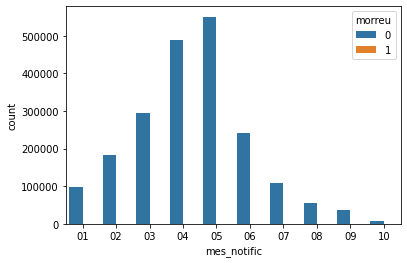

In [14]:
ax = sns.countplot(x="mes_notific", hue="morreu", data=casos_e_mortes)

# Qual proporção da mortalidade entre homens e mulheres:


[Text(0, 0, 'Feminino'), Text(0, 0, 'Ignorados'), Text(0, 0, 'Masculino')]

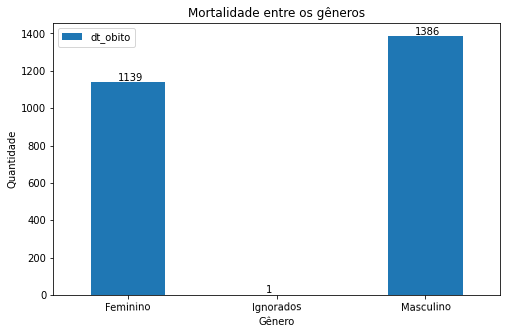

In [15]:
#Tratamento de Dados

obitos_por_genero = pd.DataFrame(df, columns= ['cs_sexo', 'dt_obito'])
obitos_por_genero = obitos_por_genero.apply(lambda x: x.replace('None', np.nan))
obitos_por_genero.dropna(inplace=True)
obitos_por_genero = obitos_por_genero.reset_index()
obitos_por_genero.drop(['index'], axis= 1 ,inplace=True)

#Final Tratamento
obitos_por_genero = obitos_por_genero.groupby(obitos_por_genero['cs_sexo']).count().plot(kind='bar', rot=1, figsize=(8,5))

for p in obitos_por_genero.patches:
  b=p.get_bbox()
  obitos_por_genero.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.18, p.get_height()+8))

plt.title('Mortalidade entre os gêneros')
plt.xlabel("Gênero")
plt.ylabel("Quantidade")
obitos_por_genero.set_xticklabels(["Feminino", "Ignorados", "Masculino"])



# Quais os Sinais Clinicos foram mais comum nos casos de dengue notificados:

<Figure size 1440x2160 with 0 Axes>

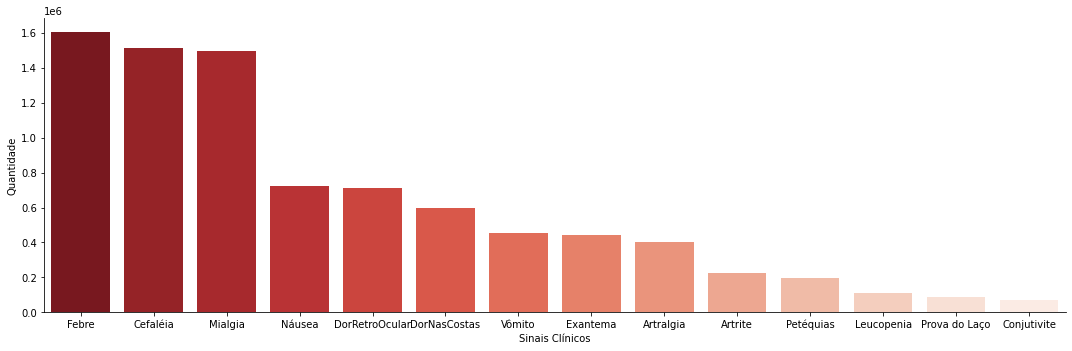

In [16]:
#Tratamento de Dados
sinais_clinicos = pd.DataFrame(df, columns= ['febre', 'mialgia', 'cefaleia',	'exantema',	'vomito',	'nausea',	'dor_costas',	'conjuntvit',	'artrite', 'artralgia',	'petequia_n',	'leucopenia',	'laco',	'dor_retro'])
sinais_clinicos = sinais_clinicos.apply(lambda x: x.replace(np.nan, 2.0))
sinais_clinicos = sinais_clinicos.apply(lambda x: x.replace(2.0, 0))

sinais_clinicos = sinais_clinicos.sum().to_frame().reset_index()
sinais_clinicos.columns = ['sinais_clinicos', 'total']
sinais_clinicos = sinais_clinicos.sort_values(['total'], ascending=False)

#Final Tratamento de Dados

plt.figure(figsize=(20,30))

g = sns.catplot(x= "sinais_clinicos", y='total', data = sinais_clinicos, kind='bar', aspect=3, palette='Reds_r')

g.set_xticklabels(["Febre", "Cefaléia","Mialgia", "Náusea", "DorRetroOcular", "DorNasCostas", "Vômito", 
            "Exantema", "Artralgia", "Artrite", "Petéquias", "Leucopenia", "Prova do Laço", "Conjutivite"])

g.set_xlabels("Sinais Clínicos")
g.set_ylabels("Quantidade")





# Qual a faixa etária onde se teve mais casos de dengue de acordo com o dataset:



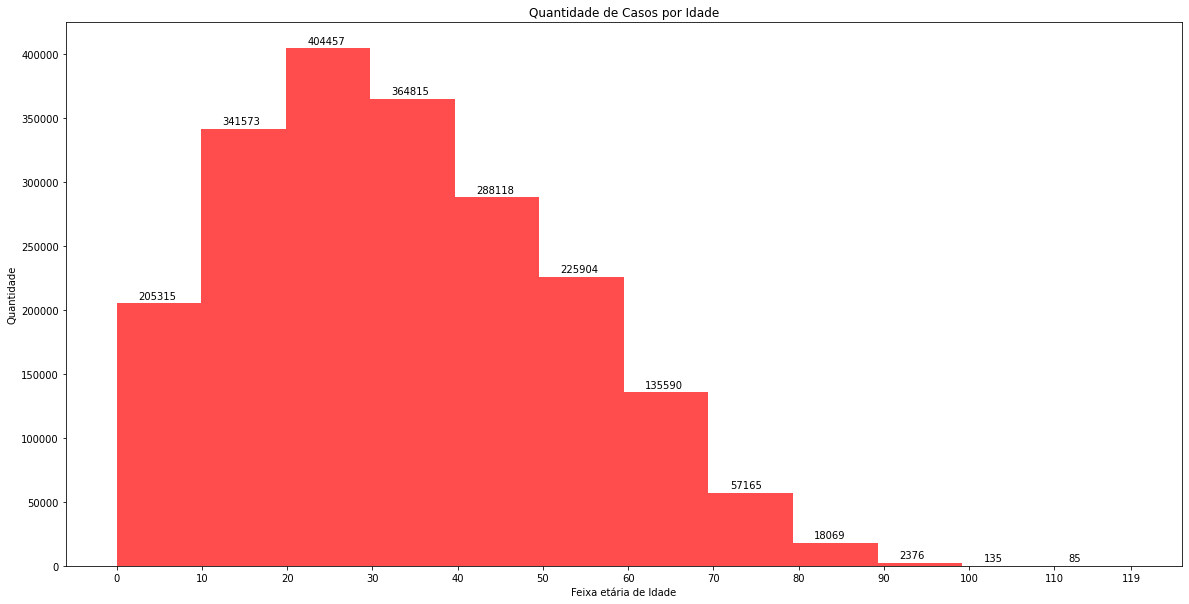

In [17]:
#Tratamento Dados

idade = pd.DataFrame(df, columns= ['dt_notific', 'dt_nasc' ])
idade = idade.apply(lambda x: x.replace('None', np.nan))
idade.dropna(inplace=True)

idade['dt_notific'] = pd.to_datetime(idade['dt_notific'], format='%Y-%m-%d')
idade['dt_nasc'] = pd.to_datetime(idade['dt_nasc'], format='%Y-%m-%d')
idade['dias_de_vida'] = (idade['dt_notific'] - idade['dt_nasc']).dt.days
idade['idade'] = (idade['dias_de_vida'] / 365).astype(int)
idade['contagem'] = 1


plot_idade = idade['idade'].hist(bins=12, color='red', alpha=.7, figsize=(20,10), grid=False)

for p in plot_idade.patches:
  b=p.get_bbox()
  plot_idade.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+ 2.5, p.get_height()+3500))


plt.xlabel('Feixa etária de Idade')
plt.ylabel('Quantidade')

plt.xticks([0,10,20,30,40,50,60,70,80,90,100,110,119])
plt.title('Quantidade de Casos por Idade')
plt.show()

